# Lista 6

### Zaimplementowane biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Zadanie 1

In [5]:
def autocov(xs, h=10):
    n = len(xs)
    autoc = 0
    xsMean = np.mean(xs)
    for i in range(n-h):
        autoc += (xs[i]-xsMean)*(xs[i+h]-xsMean)
    return autoc/n

def autocorr(xs, h=10):
    return autocov(xs, h)/autocov(xs, 0)

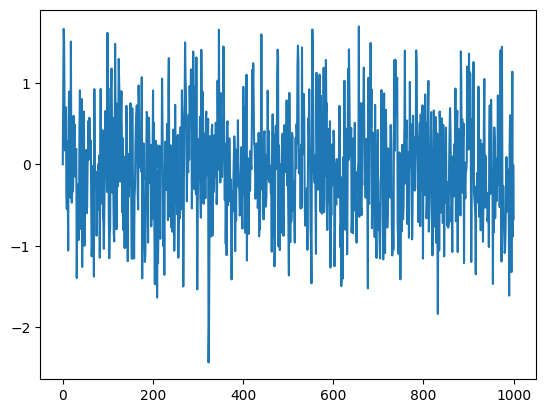

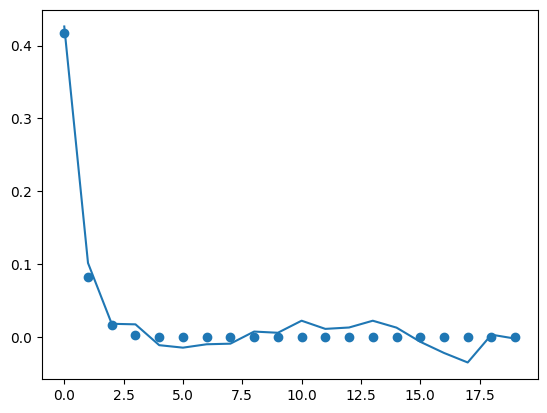

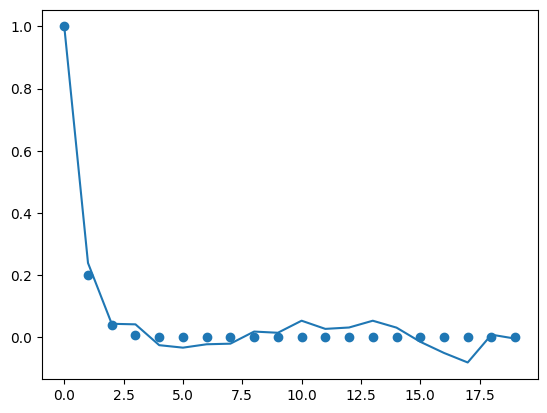

In [10]:
n = 1000
phi = 0.2
sigma = 0.4
xs = [0]
zs = np.random.normal(0,np.sqrt(sigma), size = n)
for i in range(1, len(zs)):
    xs.append(phi*xs[i-1]+zs[i])

plt.plot(np.linspace(0,1000,1000), xs)
plt.show()

autocovs = []
for i in range(20):
    autocovs.append(autocov(xs, i))

autocorrs = []
for i in range(20):
    autocorrs.append(autocorr(xs, i))

teo_covs = []
for i in range(20):
    teo_covs.append((sigma*phi**i)/(1-phi**2))

teo_corrs = []
for i in range(20):
    teo_corrs.append(phi**i)


plt.plot(np.arange(20), autocovs)
plt.scatter(np.arange(20), teo_covs)
plt.show()
plt.clf()
plt.plot(np.arange(20), autocorrs)
plt.scatter(np.arange(20), teo_corrs)
plt.show()

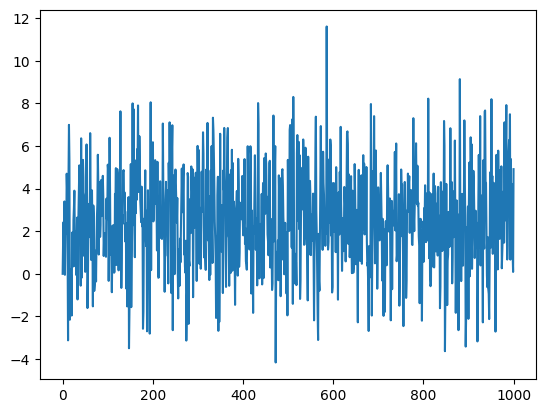

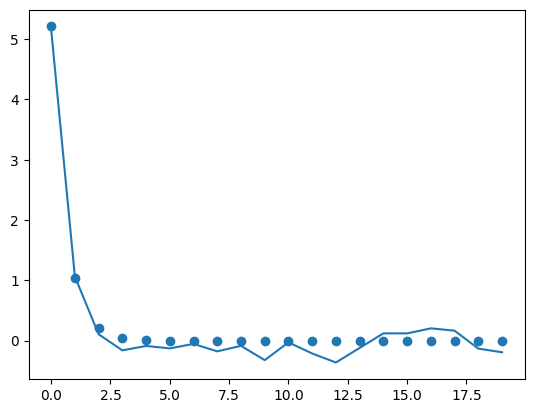

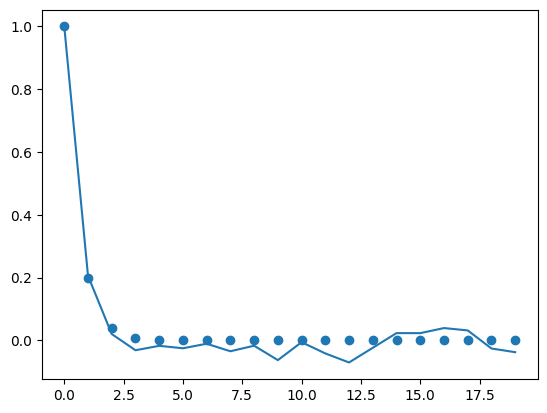

In [15]:
n = 1000
phi = 0.2
sigma = 0.4
xs = [0]
zs = sp.stats.t.rvs(10, loc=2, scale=2, size=n)
for i in range(1, len(zs)):
    xs.append(phi*xs[i-1]+zs[i])

plt.plot(np.linspace(0,1000,1000), xs)
plt.show()

autocovs = []
for i in range(20):
    autocovs.append(autocov(xs, i))

autocorrs = []
for i in range(20):
    autocorrs.append(autocorr(xs, i))

teo_covs = []
for i in range(20):
    teo_covs.append((4*10/8*phi**i)/(1-phi**2))

teo_corrs = []
for i in range(20):
    teo_corrs.append(phi**i)


plt.plot(np.arange(20), autocovs)
plt.scatter(np.arange(20), teo_covs)
plt.show()
plt.clf()
plt.plot(np.arange(20), autocorrs)
plt.scatter(np.arange(20), teo_corrs)
plt.show()

### Zadanie 2

In [43]:
n = 1000
phi = 0.2
sigma = 0.4
autocovs2d = []
autocorrs2d = []
for i in range(100):
    xs = [0]
    zs = np.random.normal(0,np.sqrt(sigma), size = n)
    for i in range(1, len(zs)):
        xs.append(phi*xs[i-1]+zs[i])
    autocovs = []
    for i in range(50):
        autocovs.append(autocov(xs, i))

    autocorrs = []
    for i in range(50):
        autocorrs.append(autocorr(xs, i))
    autocovs2d.append(autocovs)
    autocorrs2d.append(autocorrs)
teo_covs = []
for i in range(50):
    teo_covs.append((sigma*phi**i)/(1-phi**2))

teo_corrs = []
for i in range(50):
    teo_corrs.append(phi**i)

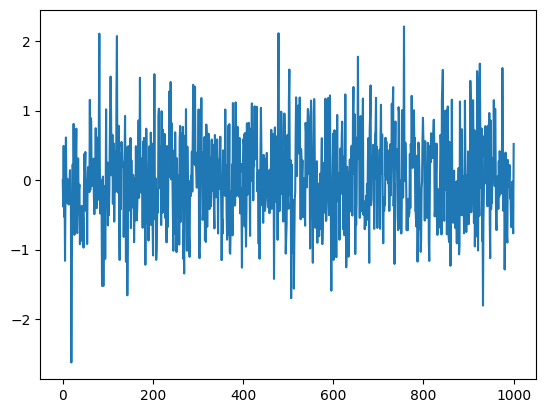

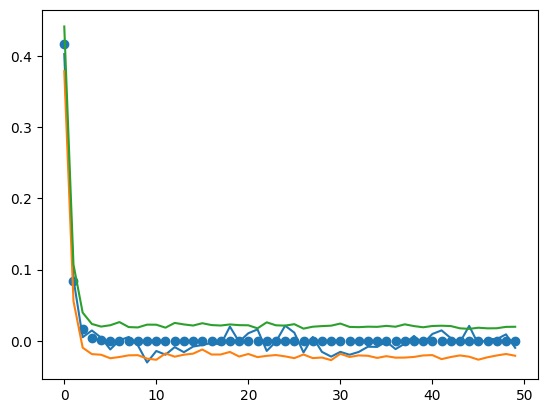

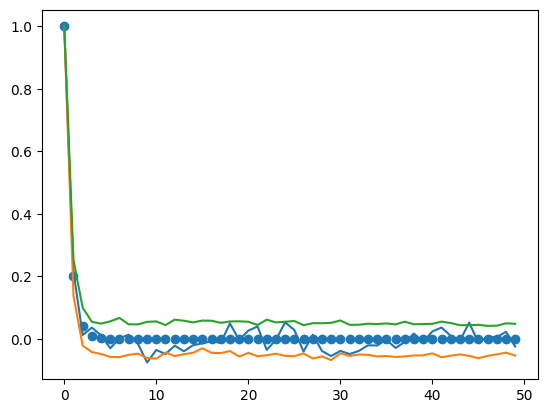

In [44]:
leftQCov = []
rightQCov = []
leftQCorr = []
rightQCorr = []
for i in range(len(autocovs2d[0])):
    values = []
    for j in range(len(autocovs2d)):
        values.append(autocovs2d[j][i])
    leftQCov.append(np.quantile(values, 0.05))
    rightQCov.append(np.quantile(values, 0.95))

for i in range(len(autocovs2d[0])):
    values = []
    for j in range(len(autocovs2d)):
        values.append(autocorrs2d[j][i])
    leftQCorr.append(np.quantile(values, 0.05))
    rightQCorr.append(np.quantile(values, 0.95))

plt.plot(np.linspace(0,1000,1000), xs)
plt.show()
plt.plot(np.arange(50), autocovs)
plt.scatter(np.arange(50), teo_covs)
plt.plot(np.arange(50), leftQCov)
plt.plot(np.arange(50), rightQCov)
plt.show()
plt.clf()
plt.plot(np.arange(50), autocorrs)
plt.scatter(np.arange(50), teo_corrs)
plt.plot(np.arange(50), leftQCorr)
plt.plot(np.arange(50), rightQCorr)
plt.show()